In [1]:
from models.model3 import linear_multiplicative_cooling, linear_additive_cooling, logarithmic_multiplicative_cooling
from models.model3 import BaseModel
from src.graph import draw_graph

import numpy as np

In [2]:
model = BaseModel()

created


In [3]:
x0 = model.nearestNeighborHeuristic(16)
print(x0)

[ 6 14 15 13 11 12 16  1  3  7  8  2  4  9  5 10]


In [4]:
initial_route, df_summary = model.decoding(x0, summary=True)
df_summary

,Vehiculo,Nodoi-1,Nodoi,Distancia,TiempoArco,TW_A,TW_B,Tanque,CO2
0,0,0,6,61.131007,1.528275,0,7,12.111560,2.888440
1,0,6,14,12.727922,0.318198,8,11,11.510166,0.601394
2,0,14,15,11.180340,0.279508,8,11,10.981895,0.528271
3,0,15,13,5.000000,0.125000,9,13,10.745645,0.236250
4,0,13,11,42.720019,1.068000,5,14,8.727124,2.018521
5,0,11,12,14.142136,0.353553,9,18,8.058908,0.668216
6,0,12,16,60.133186,1.503330,4,18,5.217615,2.841293
7,0,16,1,41.012193,1.025305,7,24,3.279789,1.937826
8,0,1,0,17.492856,0.437321,4,15,2.453251,0.826537
9,1,0,3,89.442719,2.236068,0,7,10.773832,4.226168


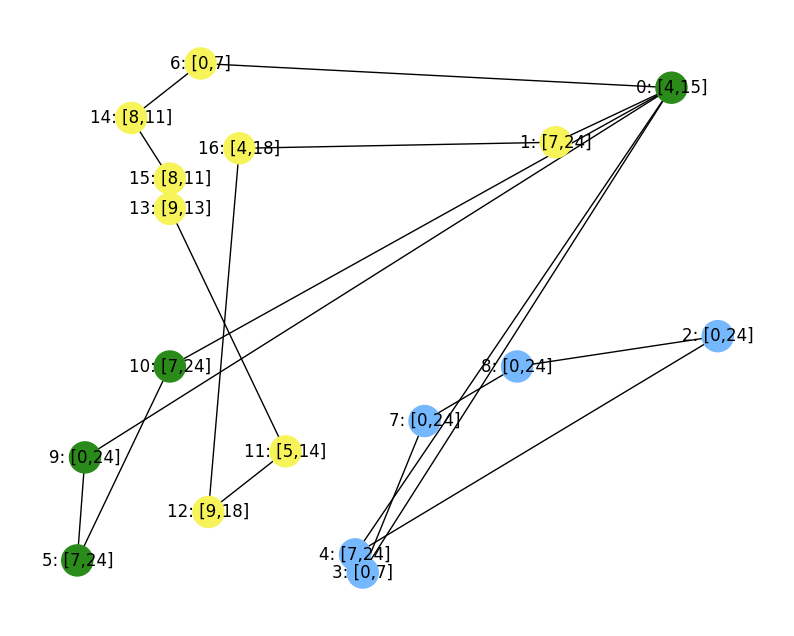

In [35]:
draw_graph(initial_route)

In [36]:
info = model.ga(
    x0= x0,
    PopSize= 100,
    ElitePopSize= 10,
    subPopSize=20,
    MaxGenerations= 60,
    localOptimumTime= 10
)

generation: 1
generation: 2
generation: 3
generation: 4
generation: 5
generation: 6
generation: 7
generation: 8
generation: 9
generation: 10
generation: 11
generation: 12
generation: 13
generation: 14
generation: 15
generation: 16
generation: 17
generation: 18
generation: 19
generation: 20
generation: 21
generation: 22
generation: 23


In [37]:
print(info['x_best'])
print(info['e_best'])

[ 6 14 15 13 11  5 10  8  2  7  3  4 12  9 16  1]
43.04629998080364


In [38]:
optimal_route, df_summary2 = model.decoding(info['x_best'], summary=True)
df_summary2

,Vehiculo,Nodoi-1,Nodoi,Distancia,TiempoArco,TW_A,TW_B,Tanque,CO2
0,0,0,6,61.131007,1.528275,0,7,12.111560,2.888440
1,0,6,14,12.727922,0.318198,8,11,11.510166,0.601394
2,0,14,15,11.180340,0.279508,8,11,10.981895,0.528271
3,0,15,13,5.000000,0.125000,9,13,10.745645,0.236250
4,0,13,11,42.720019,1.068000,5,14,8.727124,2.018521
5,0,11,5,32.449961,0.811249,7,24,7.193863,1.533261
6,0,5,10,34.176015,0.854400,7,24,5.579046,1.614817
7,0,10,8,45.000000,1.125000,0,24,3.452796,2.126250
8,0,8,2,26.476405,0.661910,0,24,2.201786,1.251010
9,0,2,0,41.436699,1.035917,4,15,0.243902,1.957884


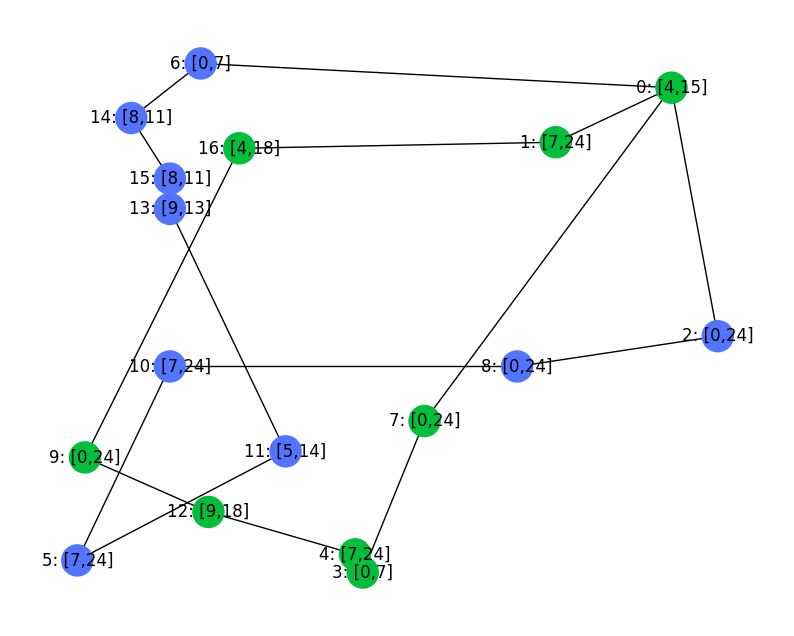

In [39]:
draw_graph(optimal_route)

In [40]:
model.draw_energy_plot(info['hist'])

## VEGSA

In [41]:
Tmax = 100 
Tmin = 20
StepMax = 100
information = model.vegsa(
    x0= x0,
    PopSize= 100,
    ElitePopSize= 10,
    subPopSize=20,
    MaxGenerations= 60,
    localOptimumTime= 10,
    StepMax= StepMax,
    Tmin= Tmin,
    Tmax= Tmax,
    SAlocalEntropyTime= 10,
    cooling_operator= linear_additive_cooling(t_max=Tmax, t_min=Tmin, alpha=0.9, step_max=StepMax)
)

GA init: 
generation: 1
generation: 2
generation: 3
generation: 4
generation: 5
generation: 6
generation: 7
generation: 8
generation: 9
generation: 10
generation: 11
generation: 12
generation: 13
generation: 14
generation: 15
generation: 16
generation: 17
GA result: 
{'x_best': array([ 6, 14, 15, 13, 10, 12,  5, 11,  7,  2,  8,  3,  4,  9, 16,  1]), 'e_best': 41.479106584458265, 'time': 17, 'hist': [(1, 52.06720074800867), (2, 52.06720074800867), (3, 50.67323868554426), (4, 50.67323868554426), (5, 43.365005205512716), (6, 42.920635698550775), (7, 41.54216572581866), (8, 41.479106584458265), (9, 41.479106584458265), (10, 41.479106584458265), (11, 41.479106584458265), (12, 41.479106584458265), (13, 41.479106584458265), (14, 41.479106584458265), (15, 41.479106584458265), (16, 41.479106584458265), (17, 41.479106584458265)]}
SA init: 
step: 1, temperature: 100, energy: 41.479106584458265
step: 2, temperature: 99.2, energy: 41.479106584458265
step: 3, temperature: 98.4, energy: 41.4791065844

In [42]:
print(information['x_best'])
print(information['e_best'])
print(information['temperature'])
print(information['time'])

[ 6 14 15 13 10  9  5 12 16  2  3  4 11  7  8  1]
38.63501724828717
20.0
101


In [43]:
optimal_route3, df_summary3 = model.decoding(information['x_best'], summary=True)
df_summary3

,Vehiculo,Nodoi-1,Nodoi,Distancia,TiempoArco,TW_A,TW_B,Tanque,CO2
0,0,0,6,61.131007,1.528275,0,7,12.111560,2.888440
1,0,6,14,12.727922,0.318198,8,11,11.510166,0.601394
2,0,14,15,11.180340,0.279508,8,11,10.981895,0.528271
3,0,15,13,5.000000,0.125000,9,13,10.745645,0.236250
4,0,13,10,26.000000,0.650000,7,24,9.517145,1.228500
5,0,10,9,18.601075,0.465027,0,24,8.638244,0.878901
6,0,9,5,17.029386,0.425735,7,24,7.833605,0.804639
7,0,5,12,18.788294,0.469707,9,18,6.945858,0.887747
8,0,12,16,60.133186,1.503330,4,18,4.104565,2.841293
9,0,16,0,56.885851,1.422146,4,15,1.416709,2.687856


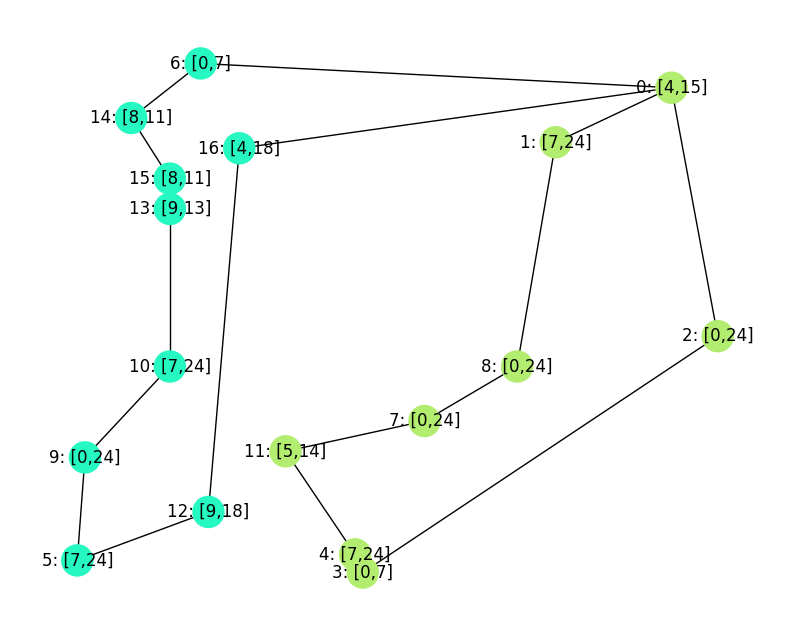

In [44]:
draw_graph(optimal_route3)

In [45]:
model.draw_energy_plot(information['hist'])